In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import matplotlib.cm as cm
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans, Birch


In [3]:
data= pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

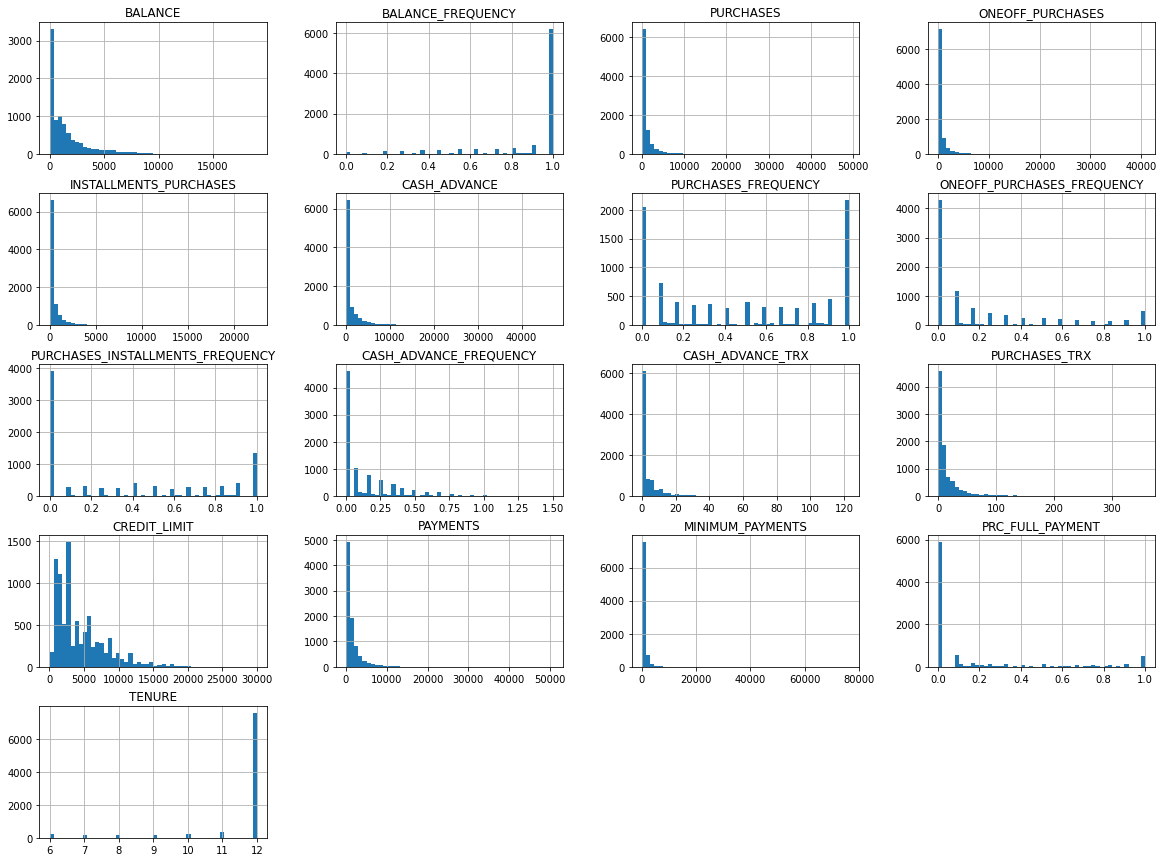

In [ ]:
data.hist(bins=50, figsize=(20,15));

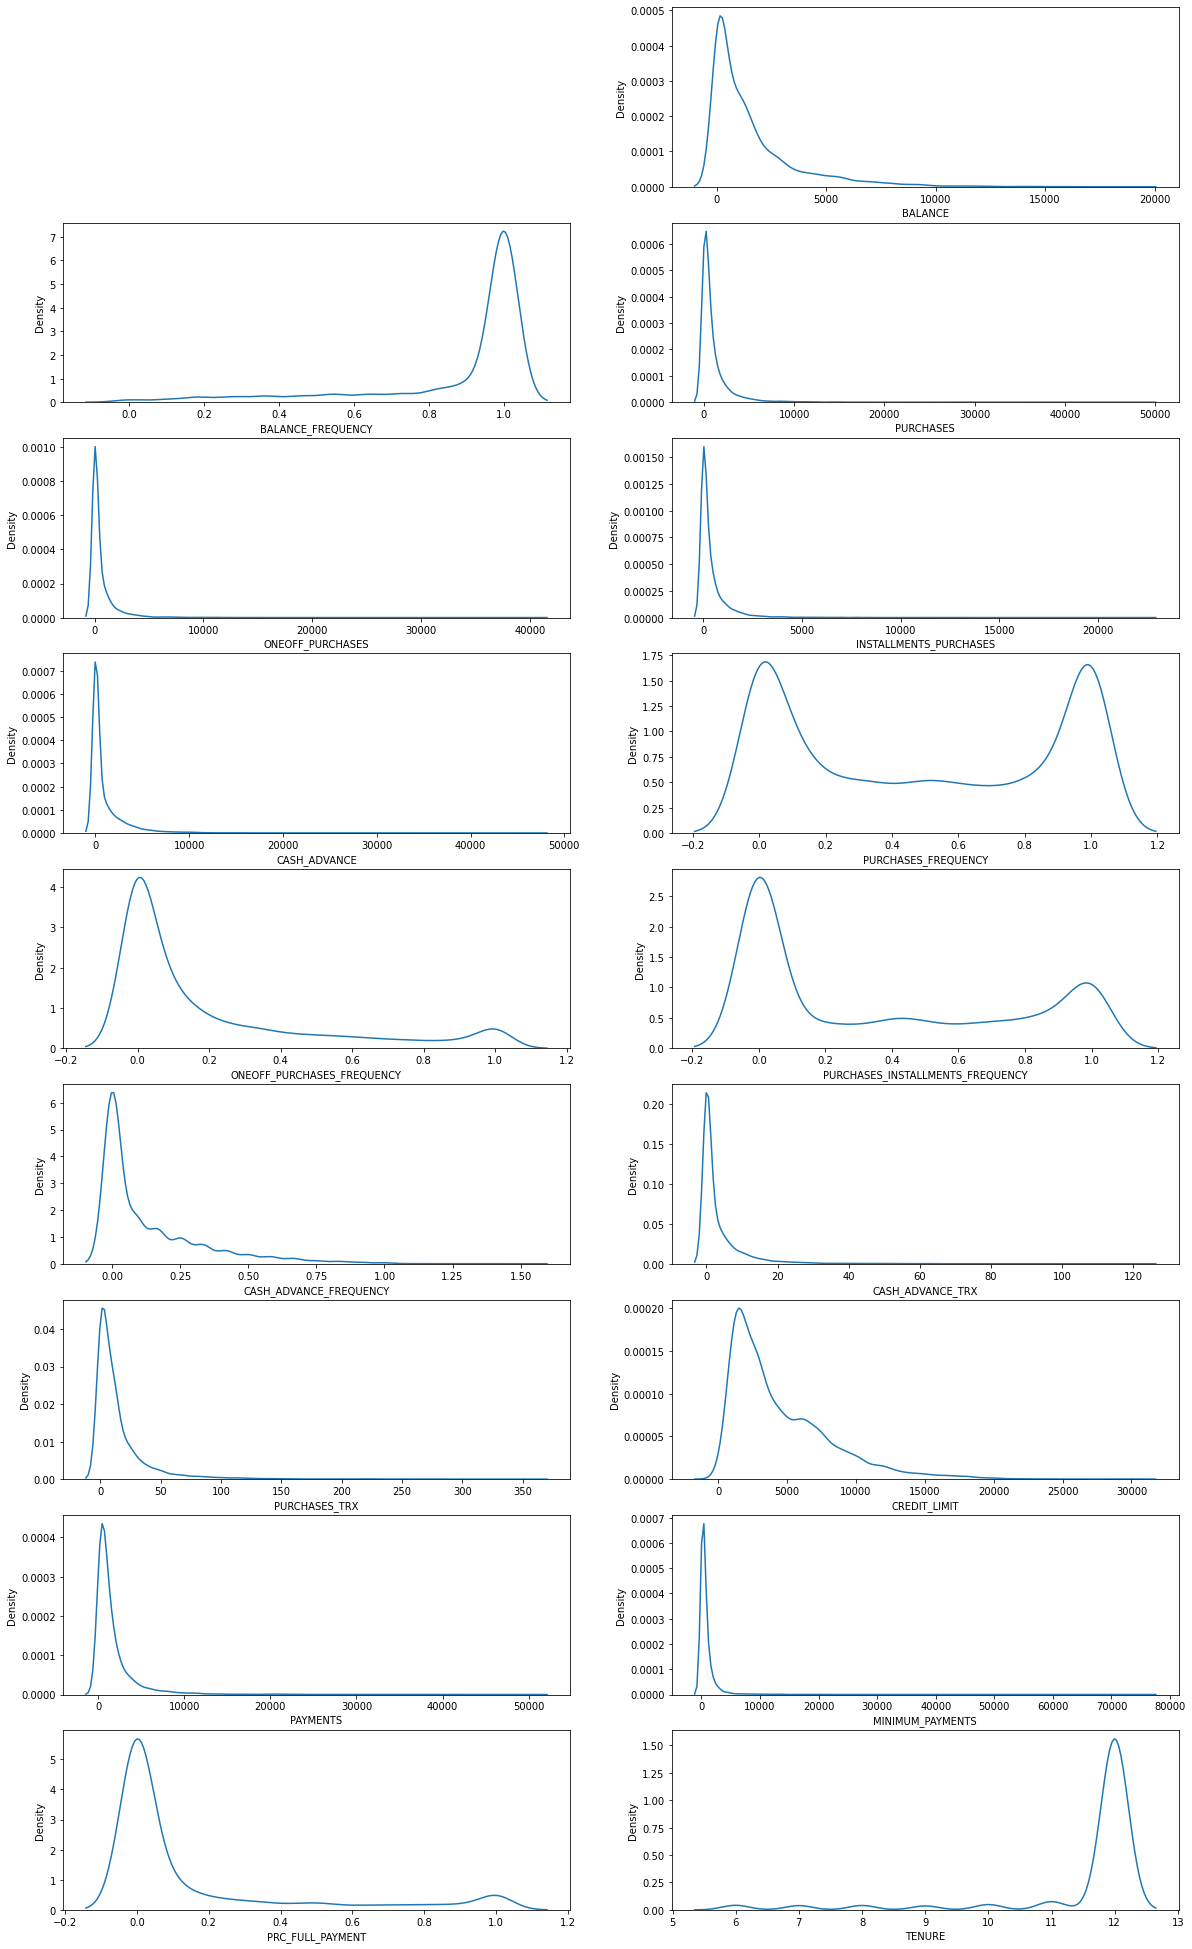

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

We observe that the data is very skewed and needs processing.

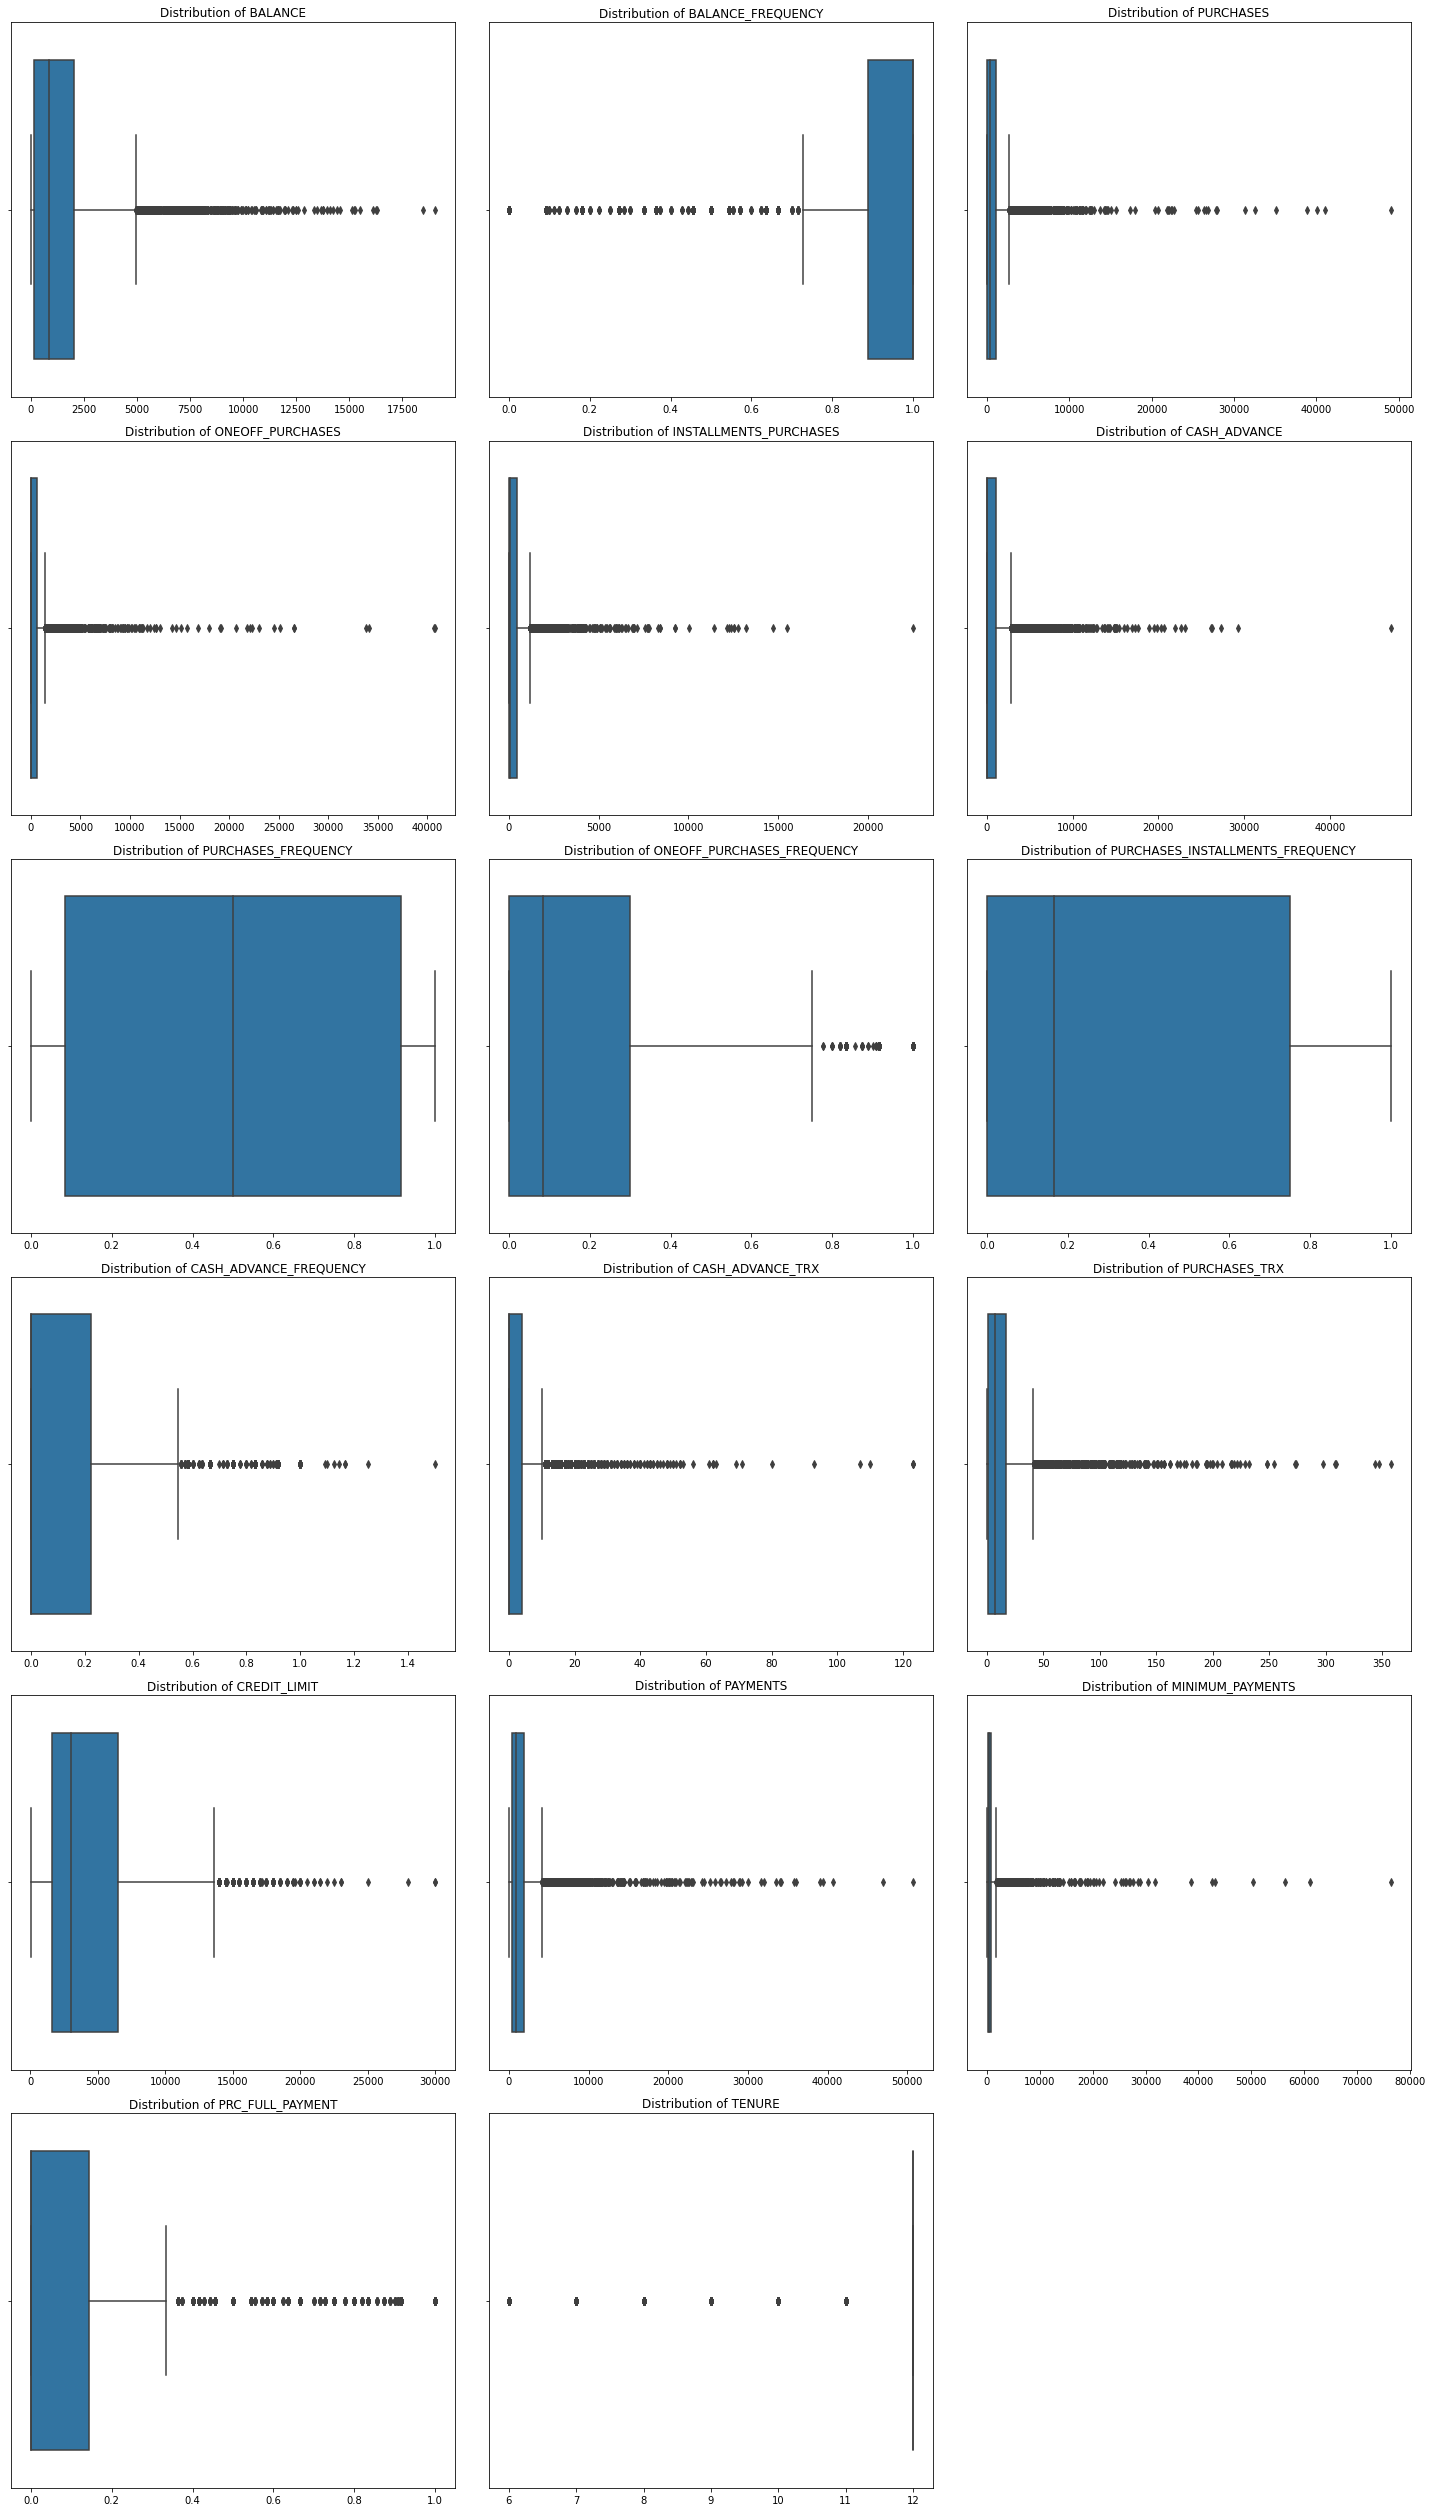

In [ ]:
df_cont = data.select_dtypes([int,float])
fig = plt.figure(figsize=(20,35))
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(6,3,i)
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None) 
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3) 
plt.show()

In [ ]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We have 2 features that have null values:

CREDIT_LIMIT : we will fill null with median

MINIMUM _PYMENT : we will consider minimum payment null values are 0 (there is no minimum payment). 

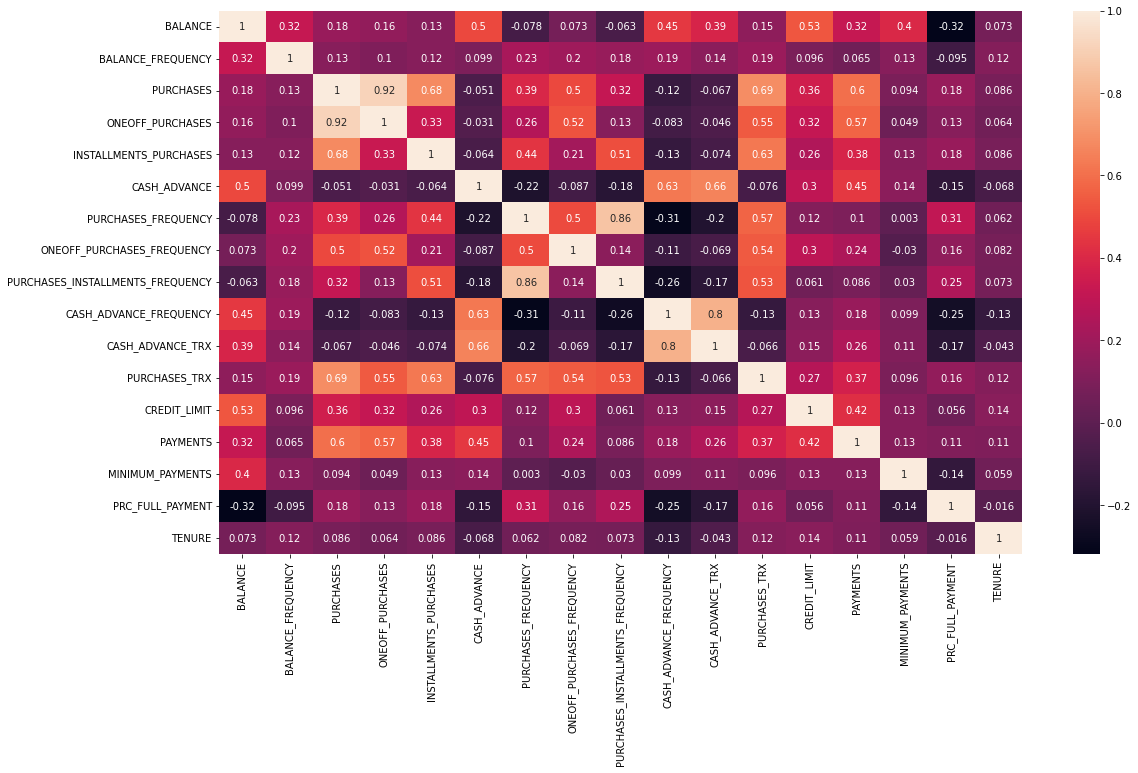

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(data = data.corr(), annot = True)

In [4]:
credit=data.copy()

In [5]:
credit = credit.drop('CUST_ID',axis=1)

In [6]:
credit["MINIMUM_PAYMENTS"].fillna(0, inplace=True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
credit["CREDIT_LIMIT"] = imputer.fit_transform(credit["CREDIT_LIMIT"].to_numpy().reshape(-1,1))

In [ ]:
credit.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#**With RobustScaler**

In [18]:

ros = RobustScaler()
for col in credit.columns:
    credit[col] = ros.fit_transform(credit[[col]])

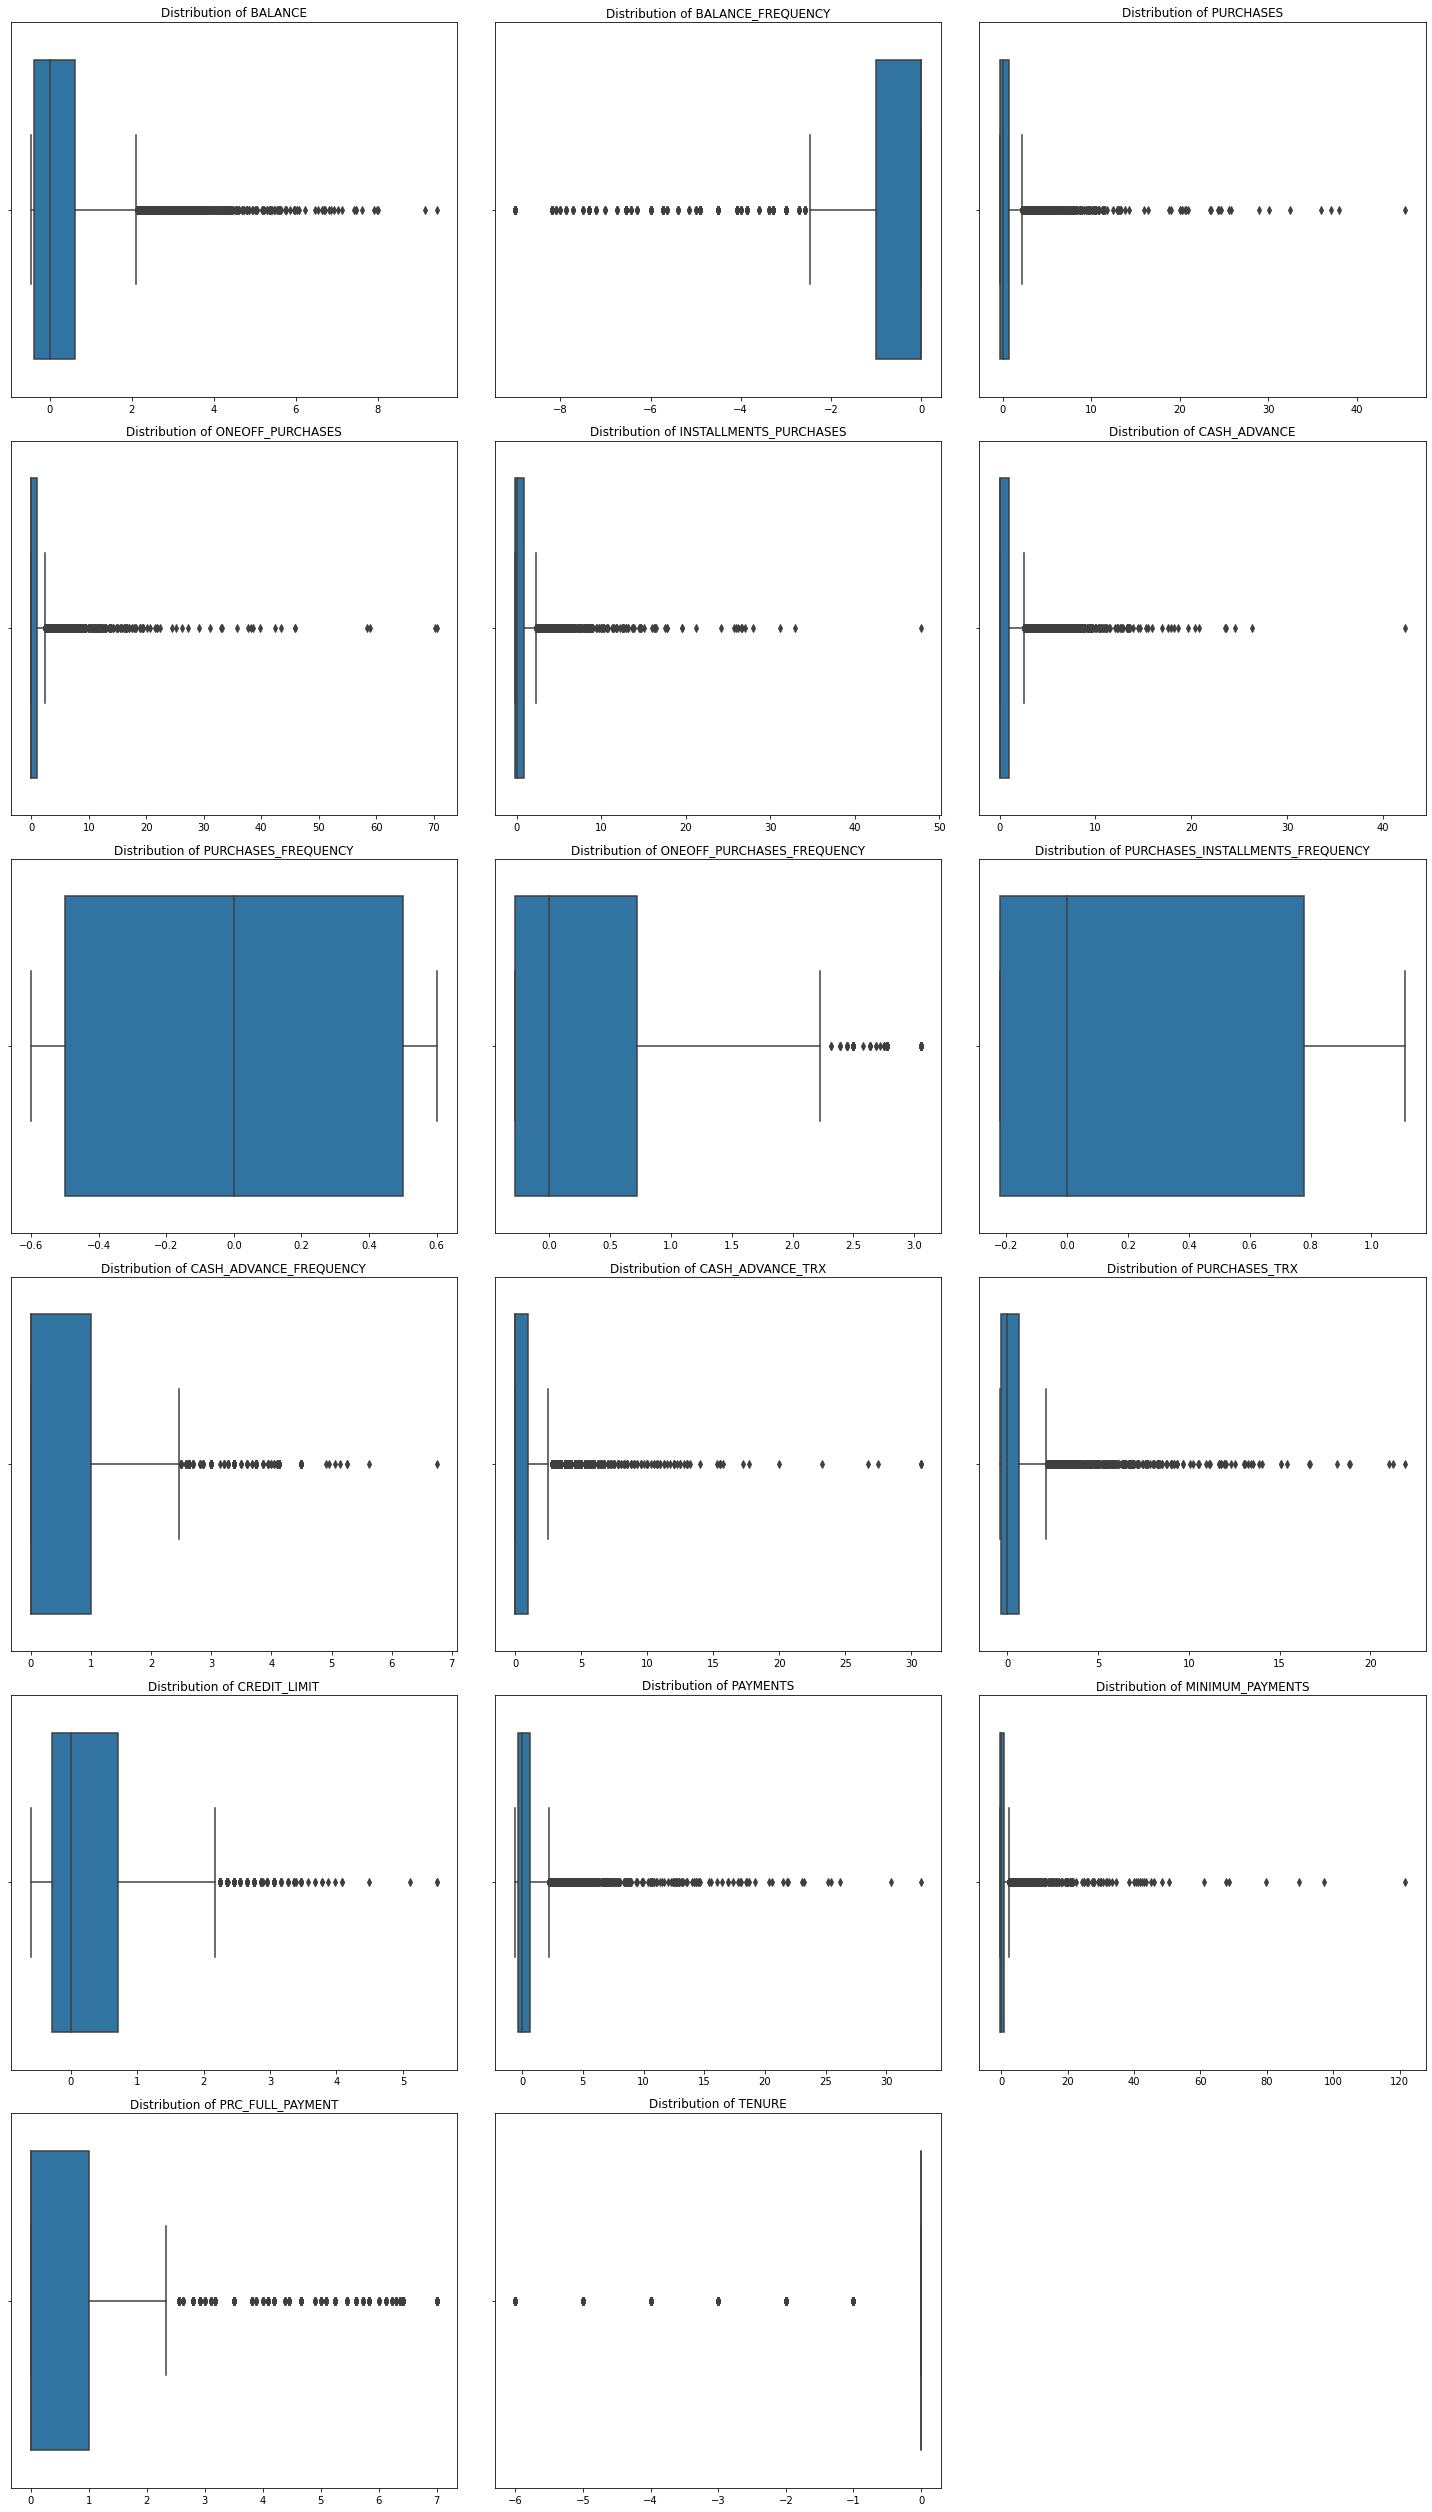

In [ ]:
df_cont = credit.select_dtypes([int,float])
fig = plt.figure(figsize=(20,35))
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(6,3,i)
    sns.boxplot(data = df_cont, x=df_cont[columns])
    ax.set_xlabel(None) 
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3) 
plt.show()

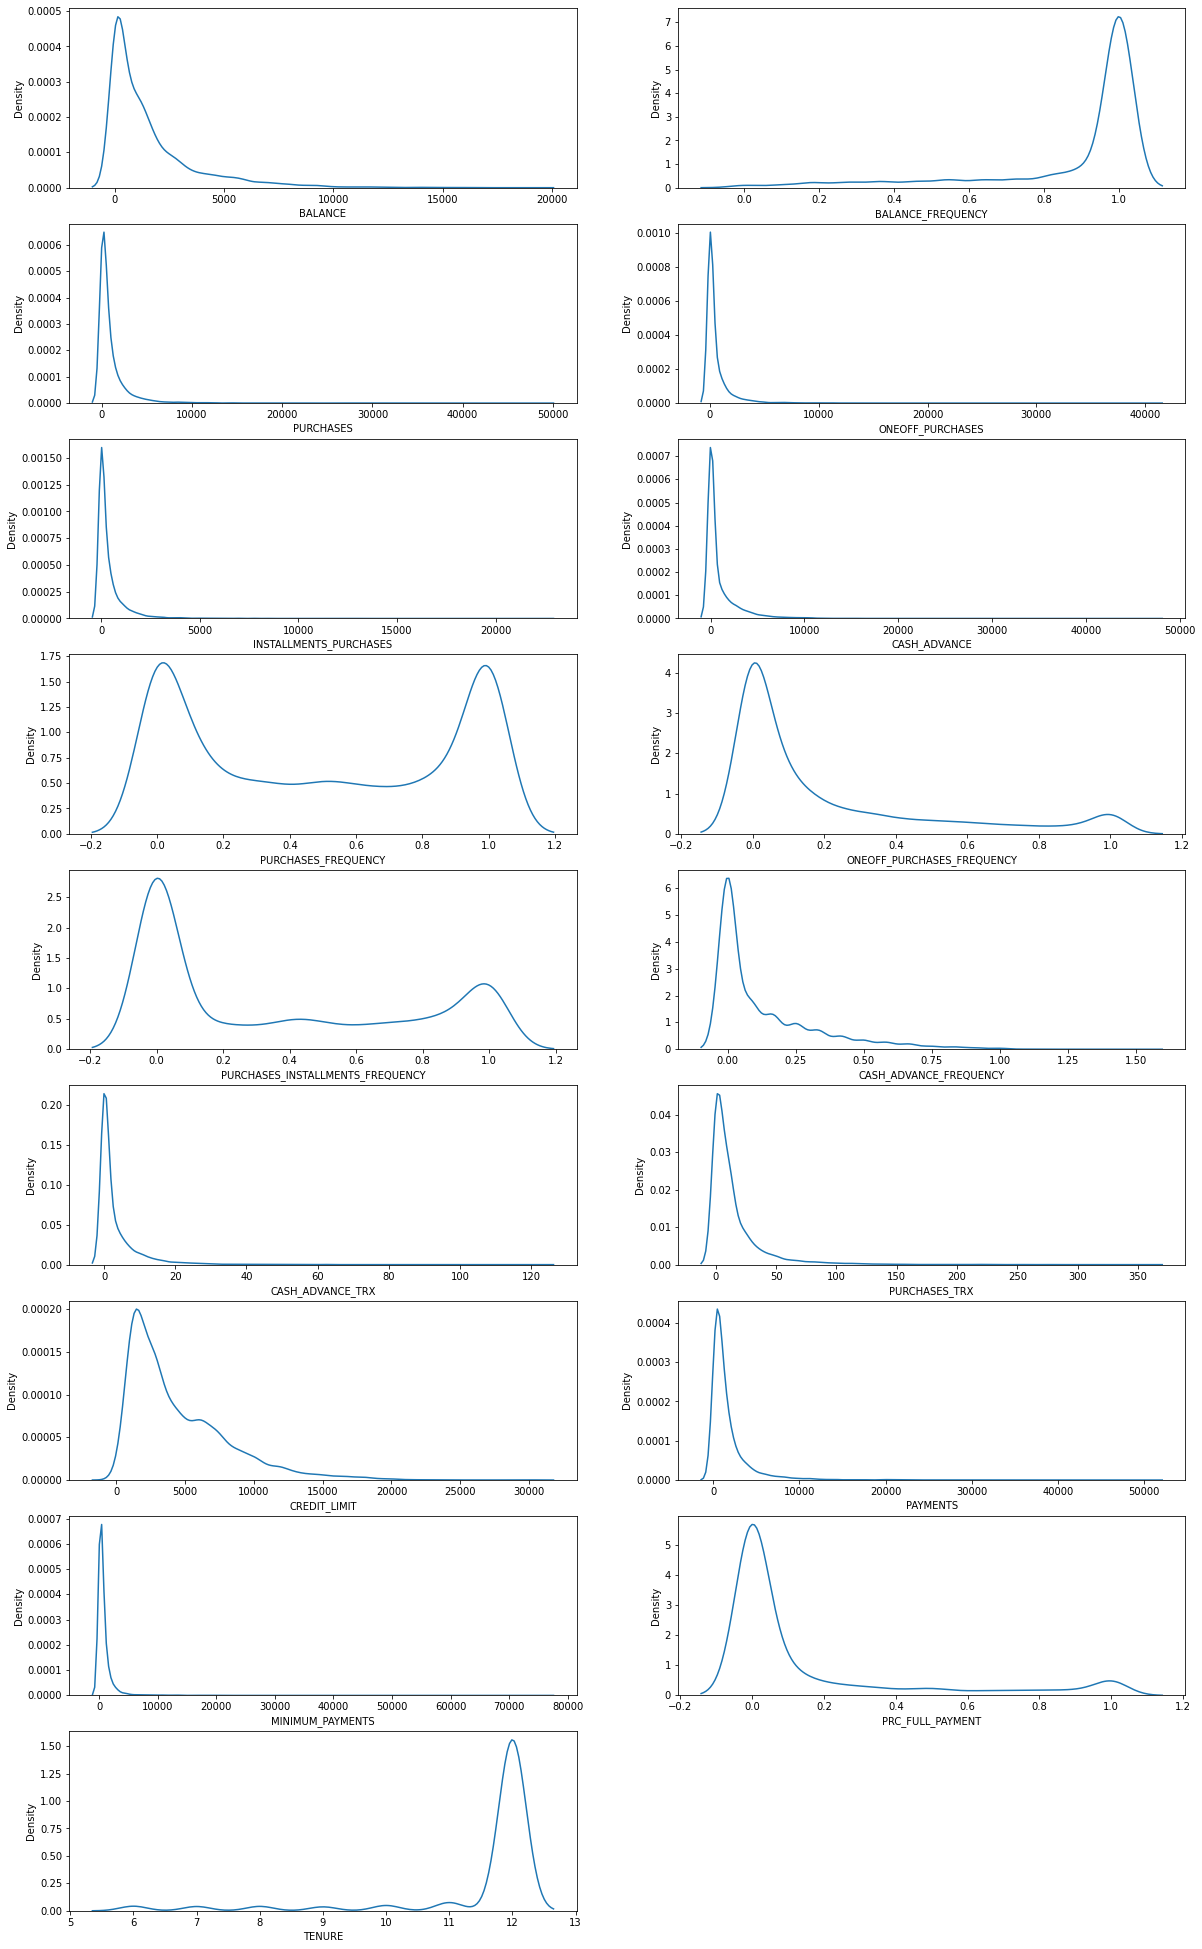

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(credit.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

##PCA

In [19]:
df_pca1 = credit.copy()
pca = PCA(n_components=0.95)
df_pca1 = pca.fit_transform(df_pca1)

In [ ]:
print(pca.explained_variance_ratio_)

[0.30301974 0.24333134 0.12352053 0.08045429 0.06992743 0.05364105
 0.03273702 0.02630536 0.02022397]


We got 9 features that cover 95% of the data.

##Model Building

###KMeans

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

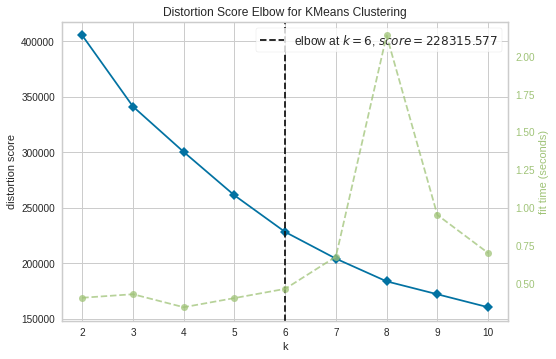

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca1)
Elbow_M.show()

From elbow, the best clusters are 6, but we will use silhouette score because it's more accurate than elbow. 

In [ ]:
def silhouette_plot(X, range_n_clusters=[2, 3, 4, 5, 6]):
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, ax1 = plt.subplots(1, 1)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6734042988340831
For n_clusters = 3 The average silhouette_score is : 0.5720329558774154
For n_clusters = 4 The average silhouette_score is : 0.3171831127859694
For n_clusters = 5 The average silhouette_score is : 0.276164325262432
For n_clusters = 6 The average silhouette_score is : 0.2976301475256971


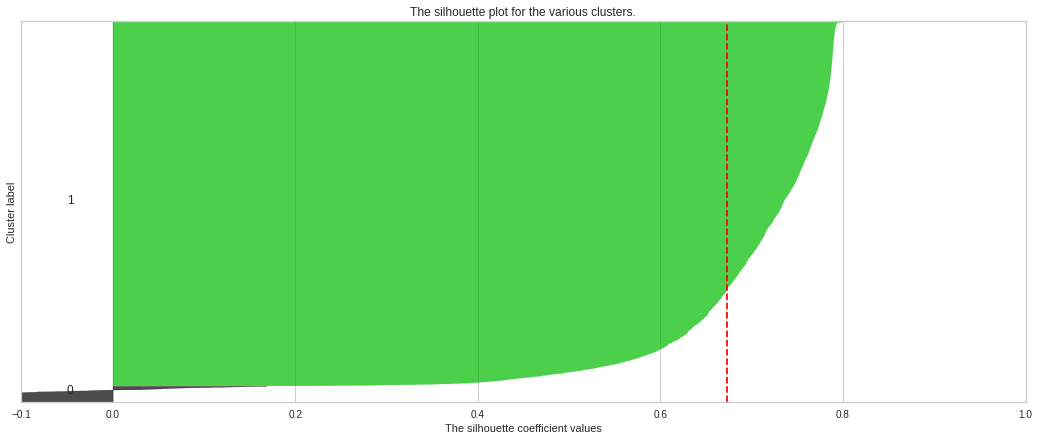

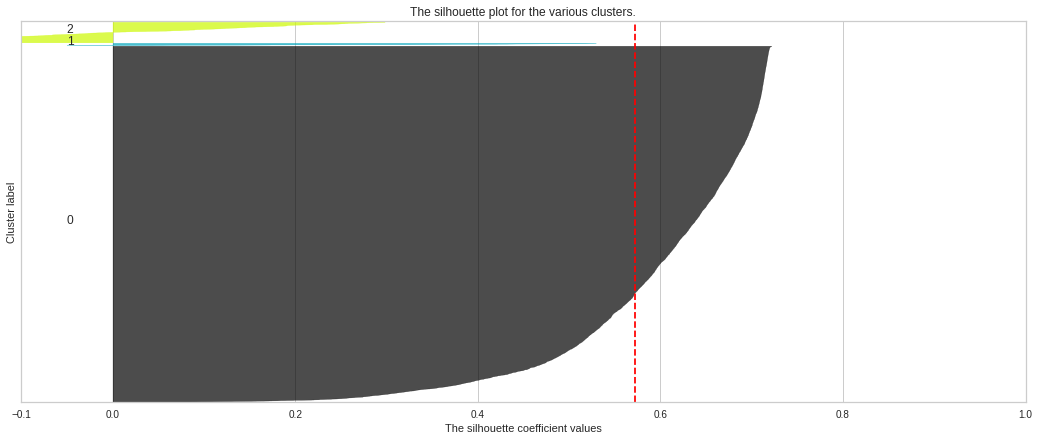

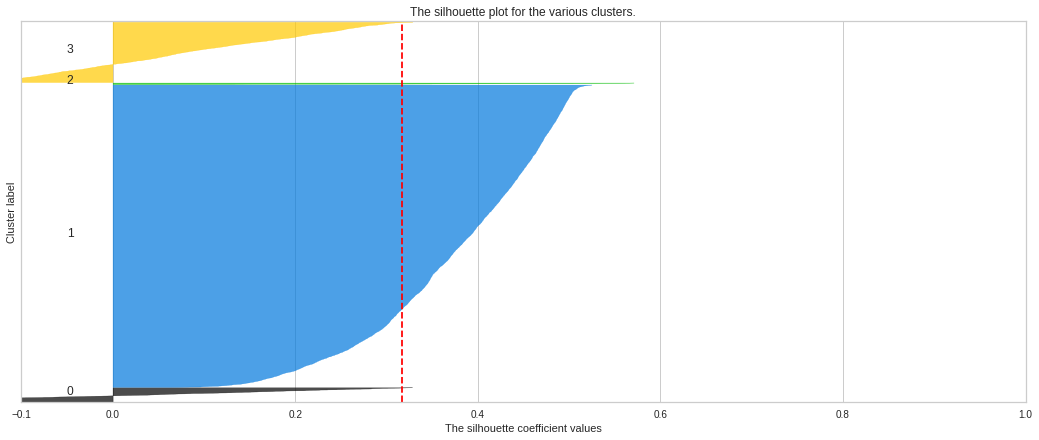

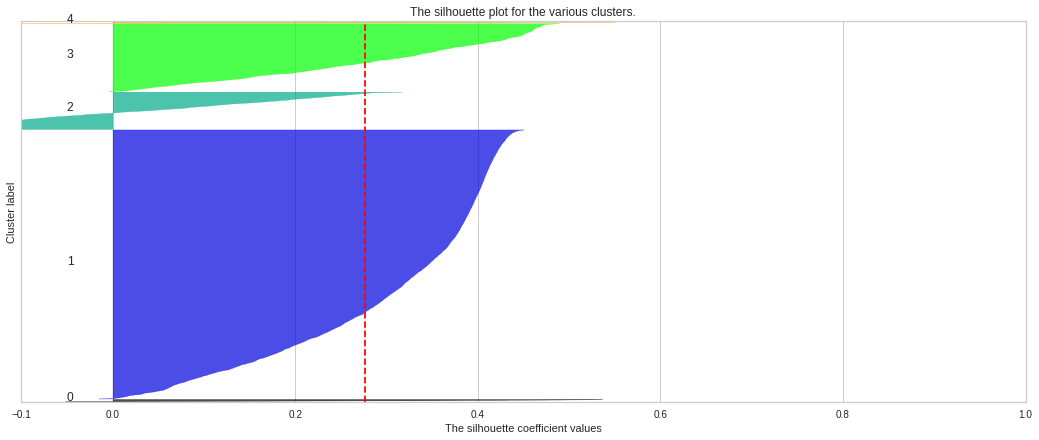

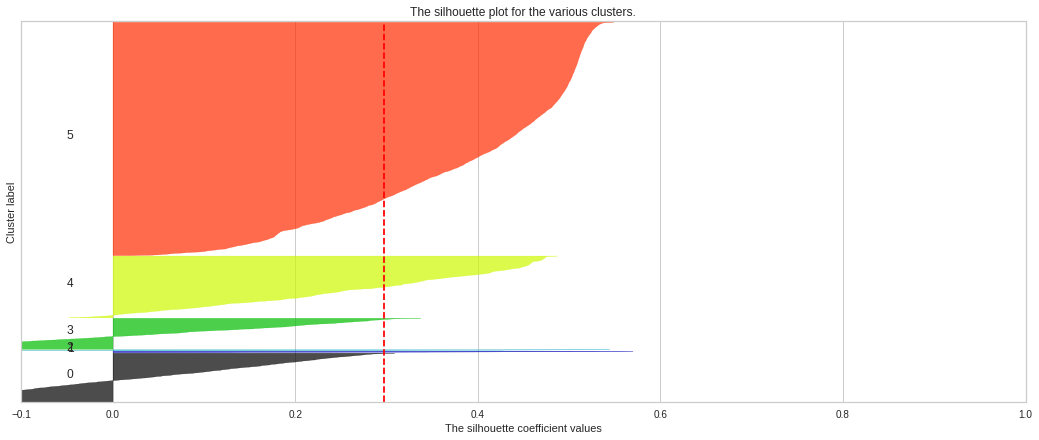

In [ ]:
silhouette_plot(df_pca1, range_n_clusters=[2, 3, 4, 5, 6])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


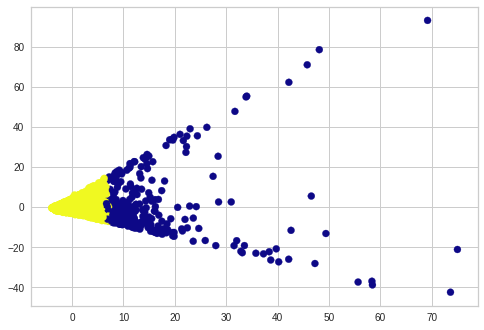

In [ ]:
model = KMeans(n_clusters=2)
yhat = model.fit_predict(df_pca1)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(df_pca1[:,0], df_pca1[:,1], c = yhat, cmap = 'plasma')
plt.show()

In [ ]:
#data_clust = df_pca1

In [ ]:
kmeans_labels = model.labels_

In [ ]:
#clean_df_labeled = data_clust.copy()

In [20]:
def make_3d_viz(df, labels):
  n_components = 3
  pca = PCA(n_components=n_components)
  pca.fit(df)

  df = pd.DataFrame(pca.transform(df), columns=([f"PC {i + 1}" for i in range(n_components)]))
  df['Labels'] = labels
  df['Labels'] = df['Labels'].astype(str)

  fig = px.scatter_3d(df, x='PC 1', y='PC 2', z='PC 3',
              color=df['Labels'])
  fig.show()

In [ ]:

make_3d_viz(df_pca1, labels=kmeans_labels)

###DBSCAN

In [ ]:

nn = NearestNeighbors(n_neighbors=30).fit(df_pca1)
distances, indices = nn.kneighbors(df_pca1)

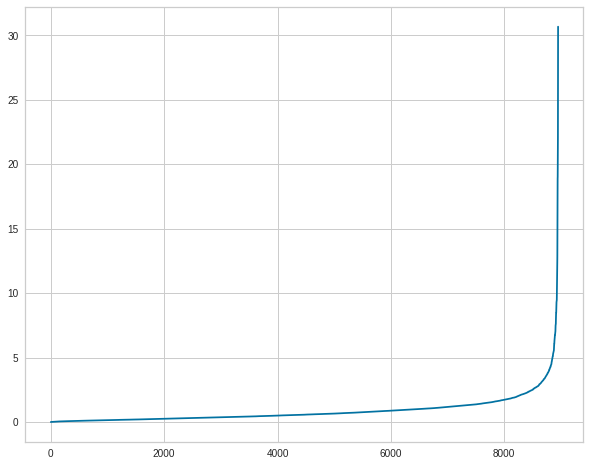

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

The best value for eps is near to 2

number of clusters:  1


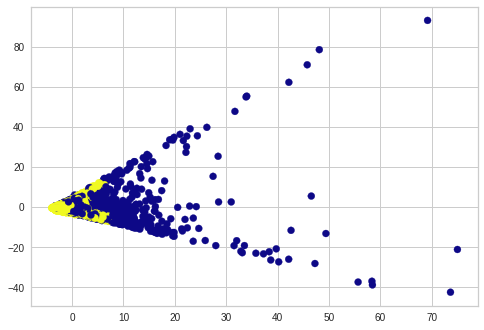

In [ ]:

model = DBSCAN(eps=2,min_samples=10)
yhat = model.fit_predict(df_pca1)
labels = model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("number of clusters: ",n_clusters_)
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(df_pca1[:,0], df_pca1[:,1], c = yhat, cmap = 'plasma')
plt.show()

In [ ]:
make_3d_viz(df_pca1, labels=labels)

###Brich 


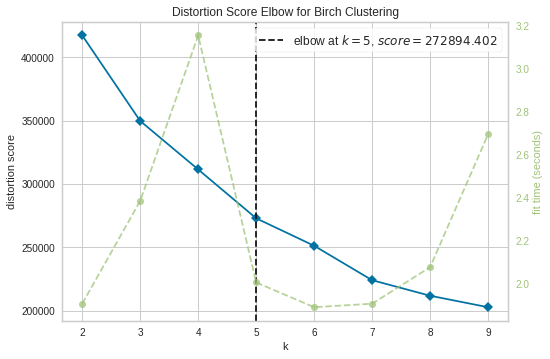

<AxesSubplot:title={'center':'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:

model = Birch()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_pca1)        # Fit the data to the visualizer
visualizer.poof()

From elbow, the best clusters are 5, but we will use silhouette score because it's more accurate than elbow. 

In [15]:
def silhouette_plot2(X, range_n_clusters=[2, 3, 4, 5, 6]):
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, ax1 = plt.subplots(1, 1)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = Birch(n_clusters=n_clusters)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.760770312882378
For n_clusters = 3 The average silhouette_score is : 0.5288846837359332
For n_clusters = 4 The average silhouette_score is : 0.4796148452767138
For n_clusters = 5 The average silhouette_score is : 0.2873871141716514
For n_clusters = 6 The average silhouette_score is : 0.28894810760032597
For n_clusters = 7 The average silhouette_score is : 0.26040212077189606


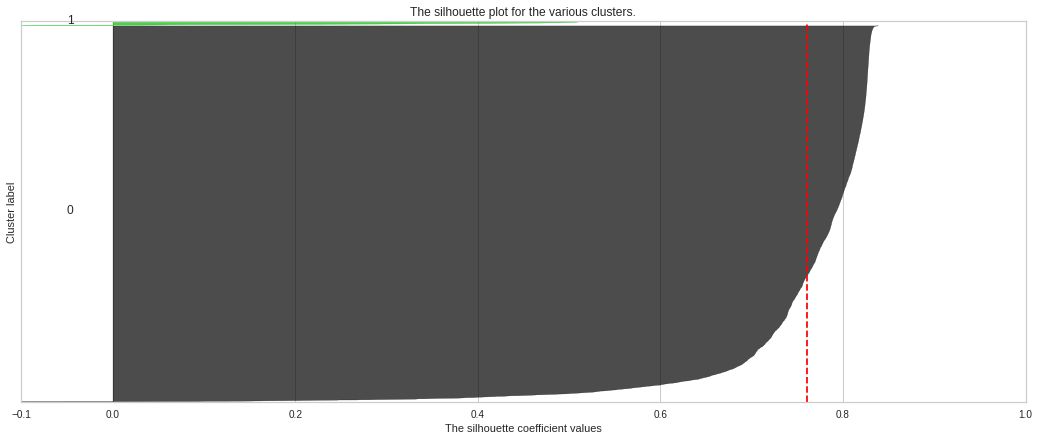

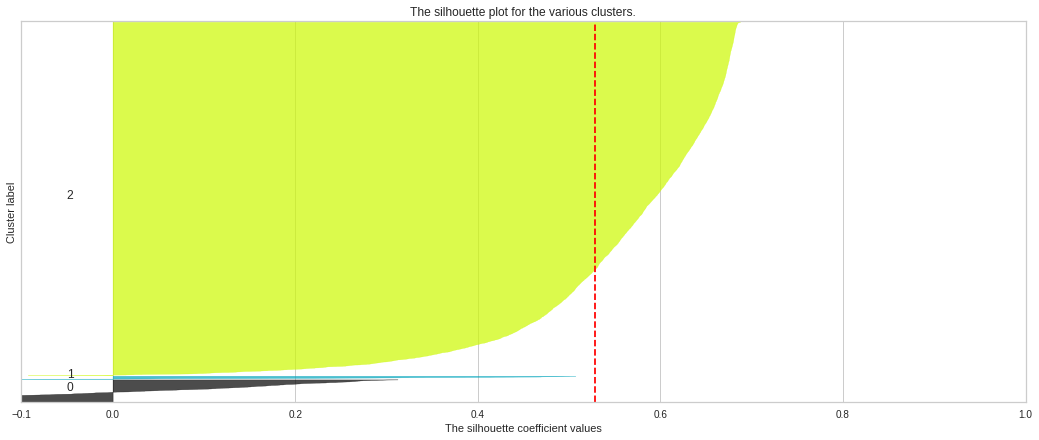

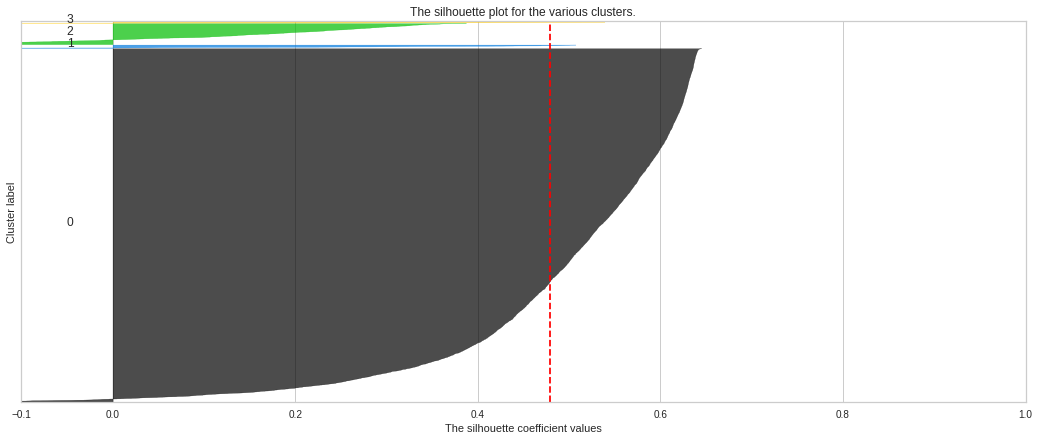

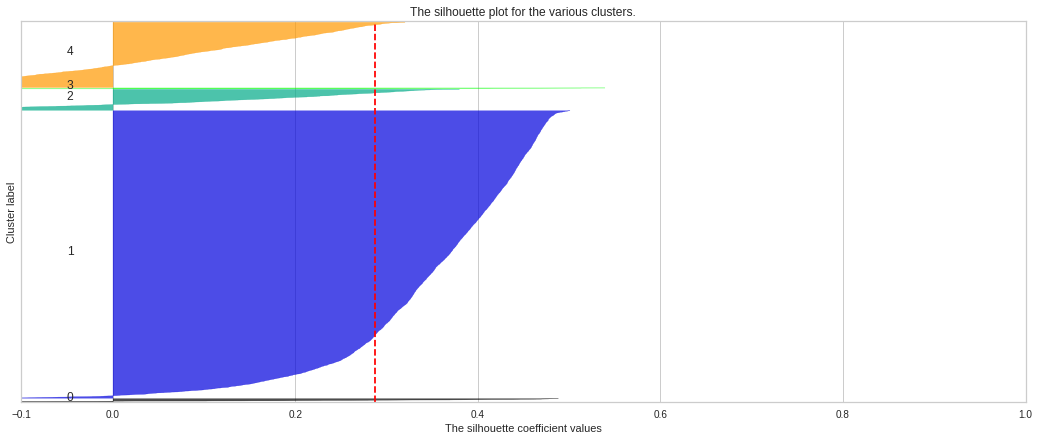

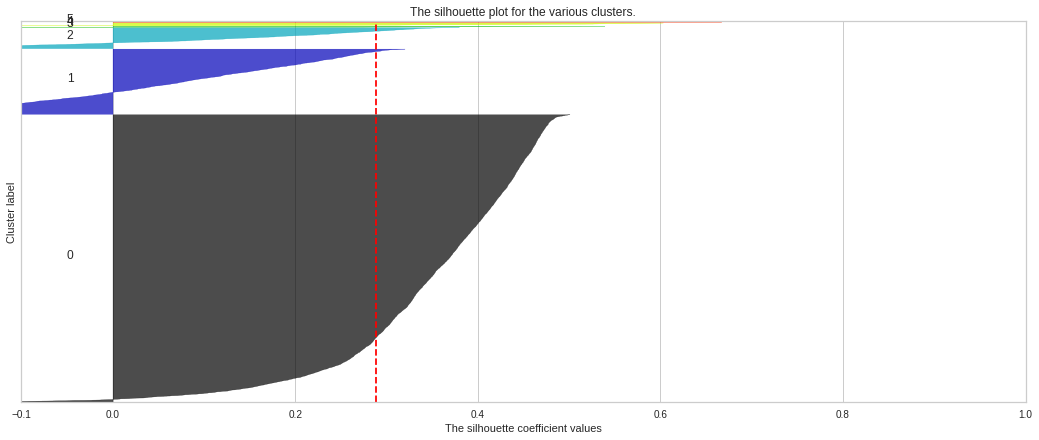

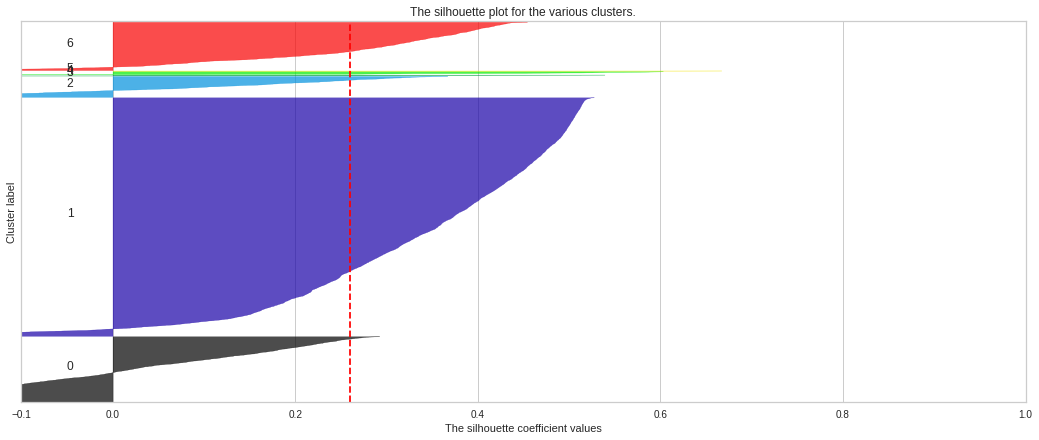

In [ ]:
silhouette_plot2(df_pca1, range_n_clusters=[2, 3, 4, 5, 6,7])

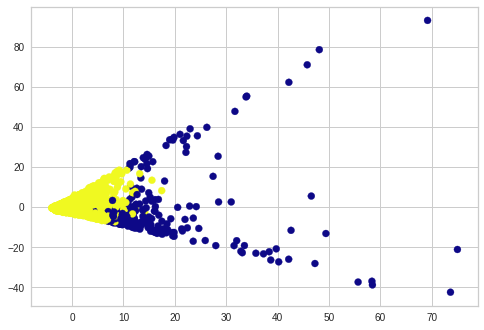

In [ ]:

model = Birch(threshold=0.01, n_clusters=2)
model.fit(df_pca1)
yhat = model.predict(df_pca1)
b_labels=model.labels_
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(df_pca1[:,0], df_pca1[:,1], c = yhat, cmap = 'plasma')
plt.show()

In [ ]:
make_3d_viz(df_pca1, labels=b_labels)

##Observation 


We tried three algorithms

**Kmeans** : we used 2  clusters with silhouette_score  67% and it's not very good

**DBSCAN** : it gives us a very bad clustering . It considers that the instances belong to one cluster and the rest of the instances are anomalies

 **Brich** : we choose 2 clusters with a silhouette_score 76% and it gives us the best results between the three algorithms
 
**Note** : Maybe with other algorithms like Agglomerative or Spectral we get better results 

#**With Power Transformer**

In [7]:
credit_1=data.copy()

In [8]:
credit_1=credit_1.drop('CUST_ID',axis=1)

In [9]:
credit_1["MINIMUM_PAYMENTS"].fillna(0, inplace=True)
imputer = SimpleImputer(strategy='median')
credit_1["CREDIT_LIMIT"] = imputer.fit_transform(credit["CREDIT_LIMIT"].to_numpy().reshape(-1,1))

In [10]:
pt = PowerTransformer()
for col in credit_1.columns:
   credit_1[col] = pt.fit_transform(credit_1[[col]])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


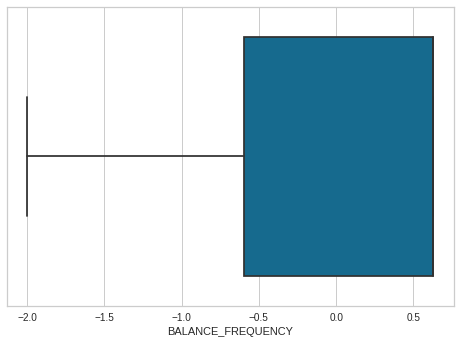

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


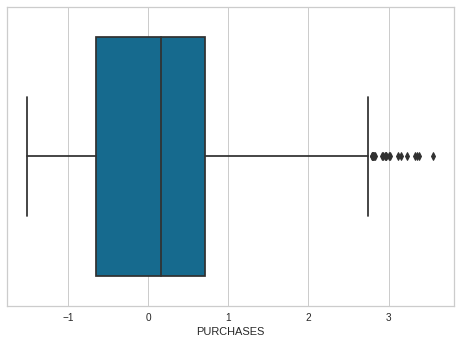

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


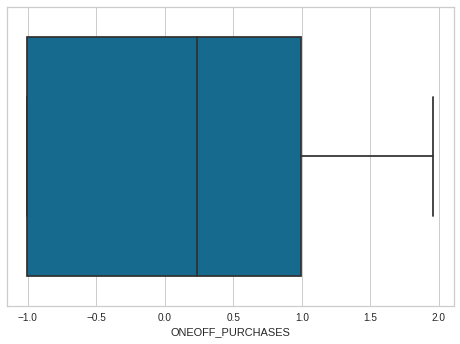

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


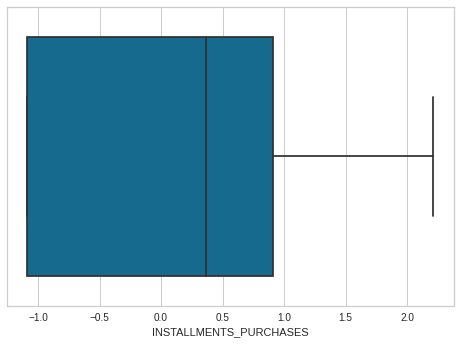

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


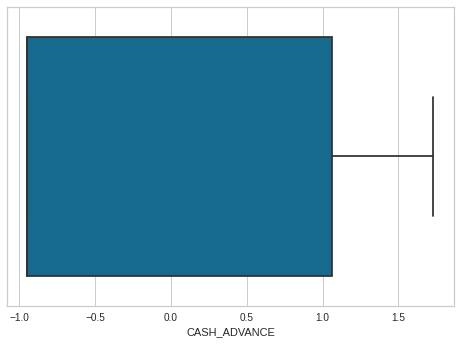

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


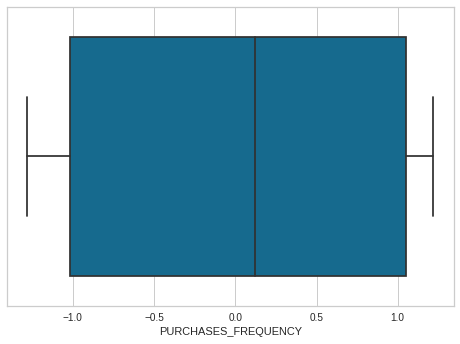

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


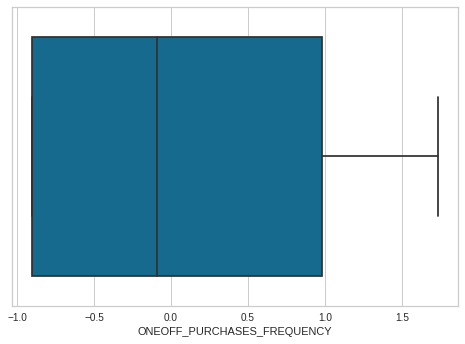

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


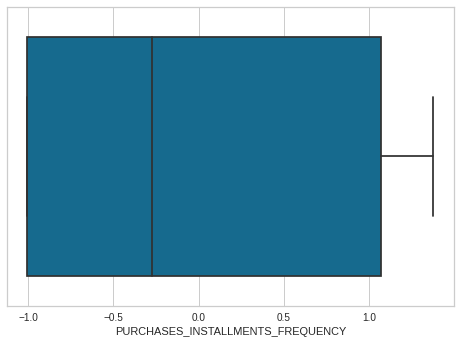

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


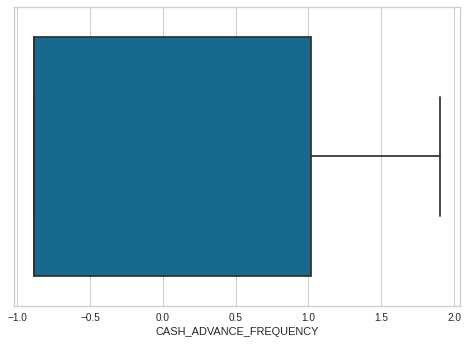

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


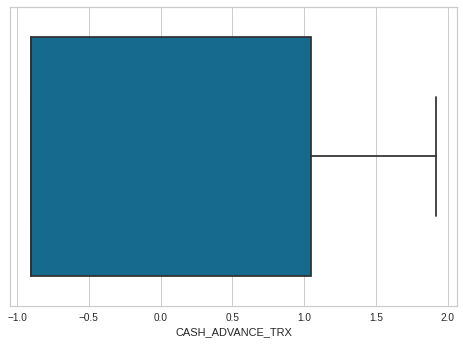

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


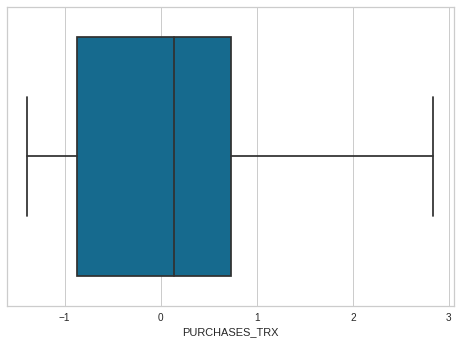

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


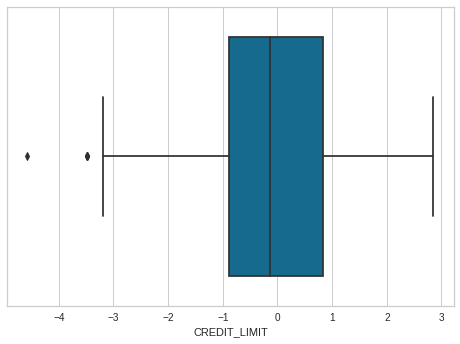

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


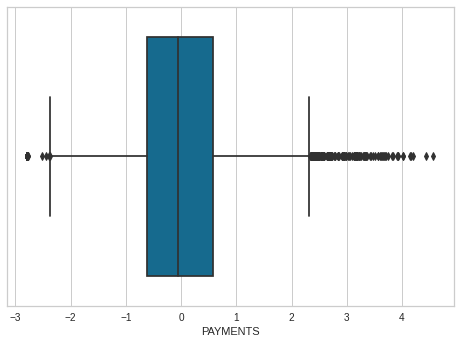

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


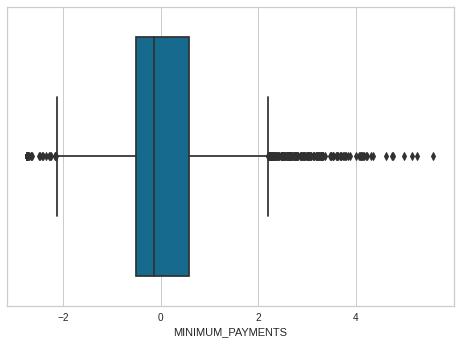

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


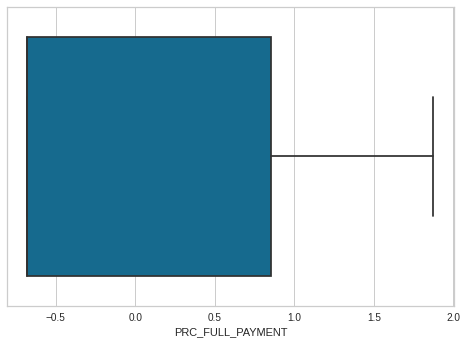

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


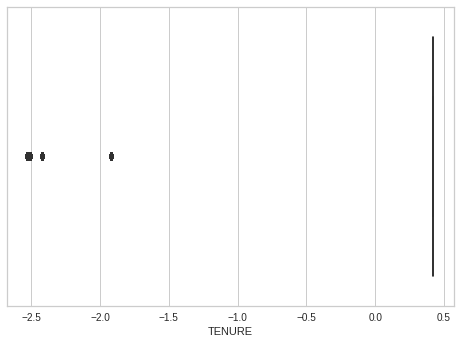

In [11]:
cols = credit_1.columns
for col in cols[1:]:
    sns.boxplot(credit_1[col])
    plt.show()

The data is now much better and closer to normal distribution. 

##PCA

In [12]:
df_pca2 = credit_1.copy()
pca = PCA(n_components=0.95)
df_pca2 = pca.fit_transform(df_pca2)

##MODEL BUILDING

###KMeans

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

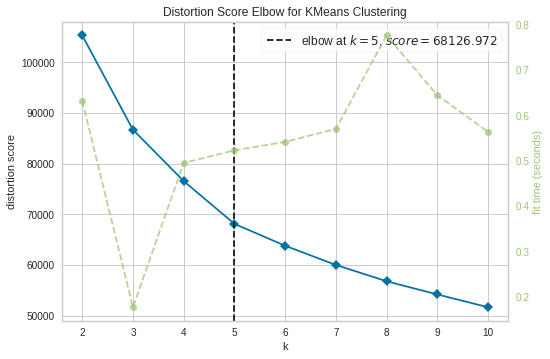

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca2)
Elbow_M.show()

From elbow, the best clusters are 5, but we will use silhouette score because it's more accurate than elbow. 

For n_clusters = 2 The average silhouette_score is : 0.2712350908315306
For n_clusters = 3 The average silhouette_score is : 0.2450818863204957
For n_clusters = 4 The average silhouette_score is : 0.23932901238434454
For n_clusters = 5 The average silhouette_score is : 0.25227274201148053
For n_clusters = 6 The average silhouette_score is : 0.2306937923645169
For n_clusters = 7 The average silhouette_score is : 0.22326894015120688


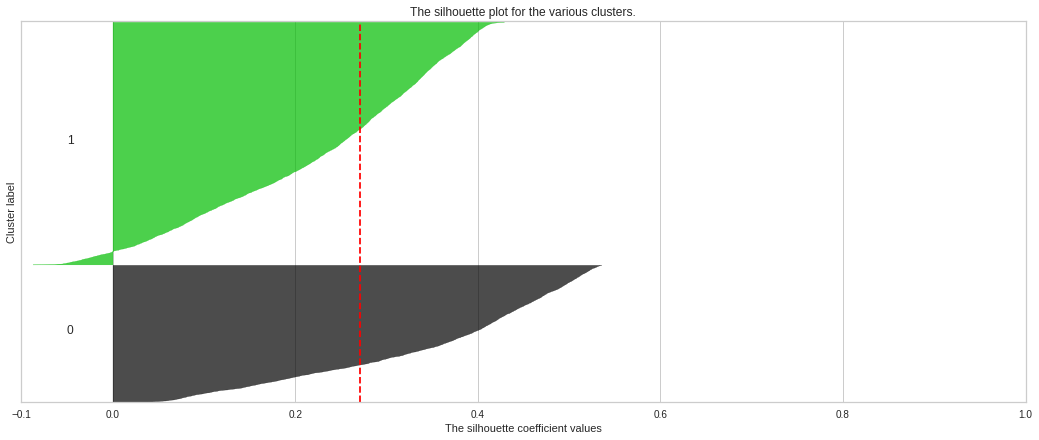

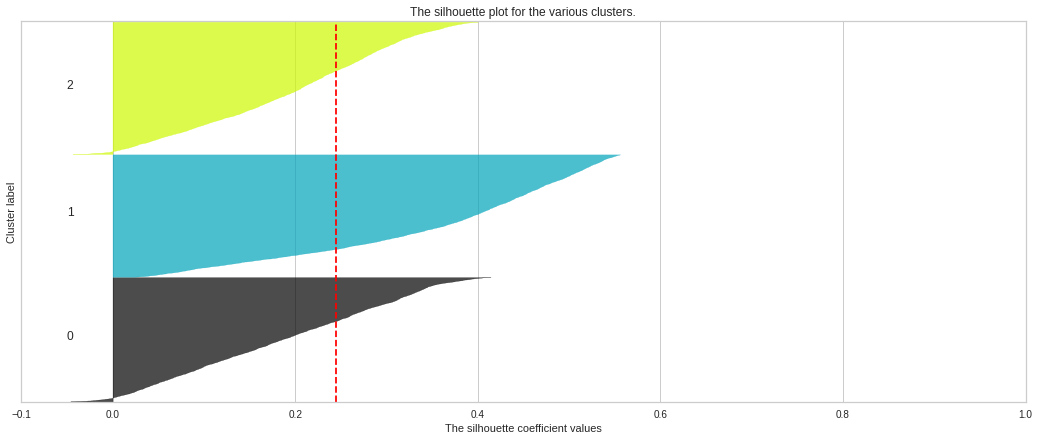

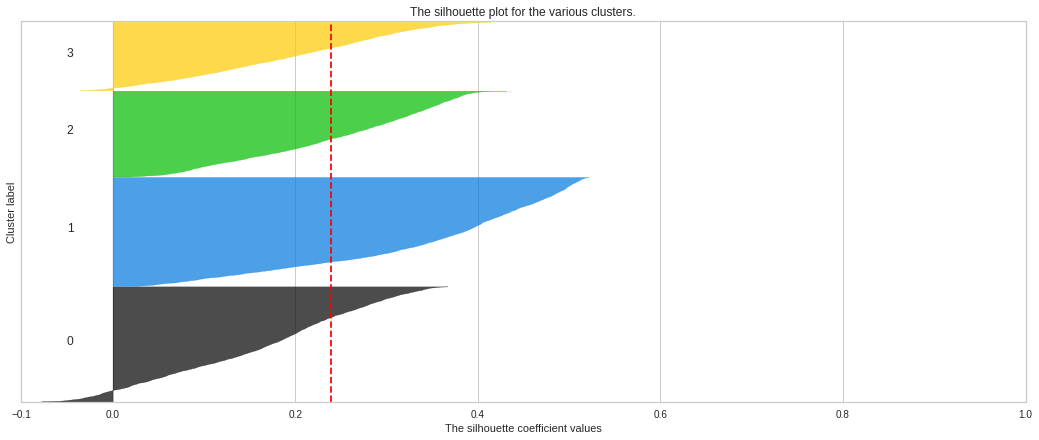

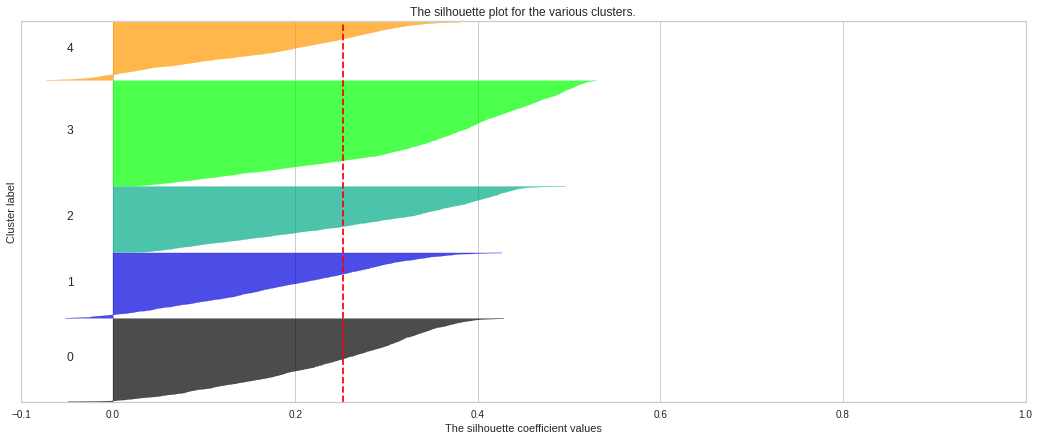

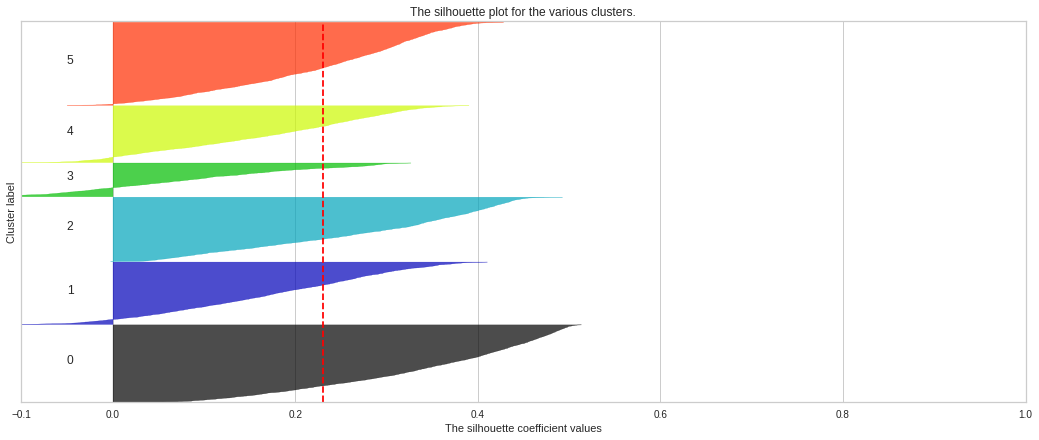

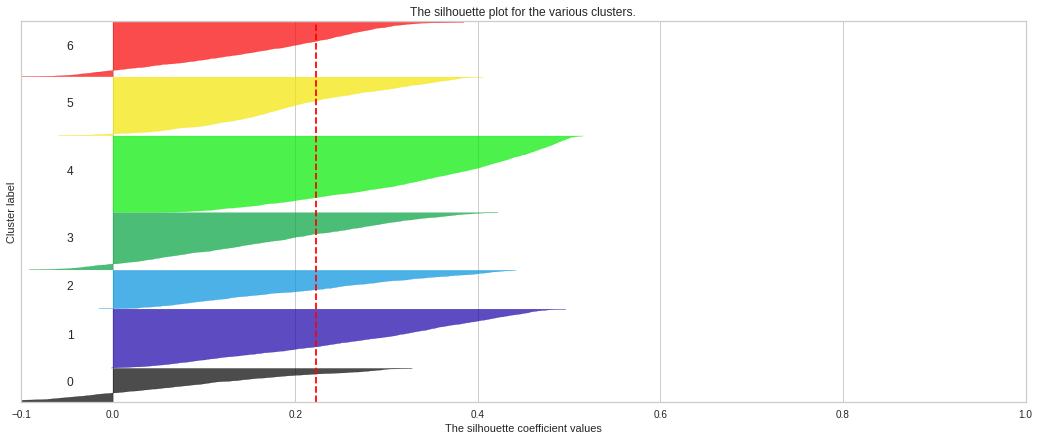

In [ ]:
silhouette_plot(df_pca2, range_n_clusters=[2, 3, 4, 5, 6,7])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



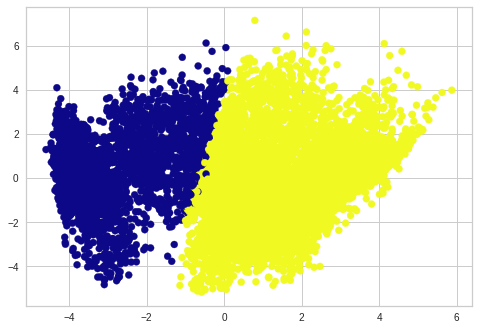

In [ ]:
model = KMeans(n_clusters=2)
yhat = model.fit_predict(df_pca2)
kmeans_labels=model.labels_
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(df_pca2[:,0], df_pca2[:,1], c = yhat, cmap = 'plasma')
plt.show()

In [ ]:
make_3d_viz(df_pca2, labels=kmeans_labels)

###DBSCAN

In [ ]:
nn = NearestNeighbors(n_neighbors=30).fit(df_pca2)
distances, indices = nn.kneighbors(df_pca2)

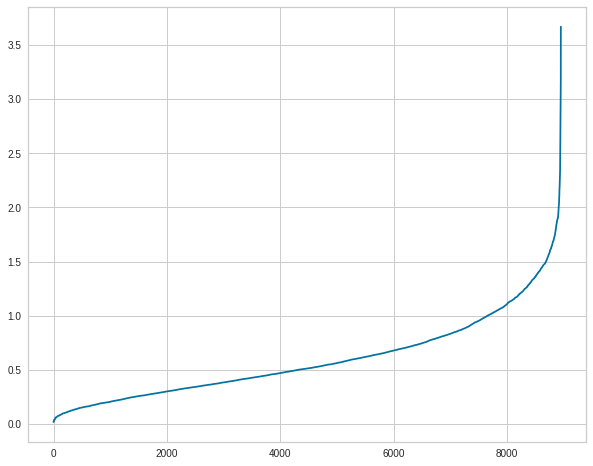

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

The best value for eps is near to 0.8

number of clusters:  30


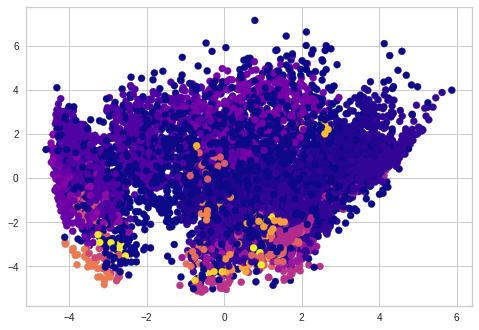

In [ ]:
model = DBSCAN(eps=0.8,min_samples=10)
yhat = model.fit_predict(df_pca2)
labels = model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("number of clusters: ",n_clusters_)
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(df_pca2[:,0], df_pca2[:,1], c = yhat, cmap = 'plasma')
plt.show()

In [ ]:
make_3d_viz(df_pca2, labels=labels)

###Brich


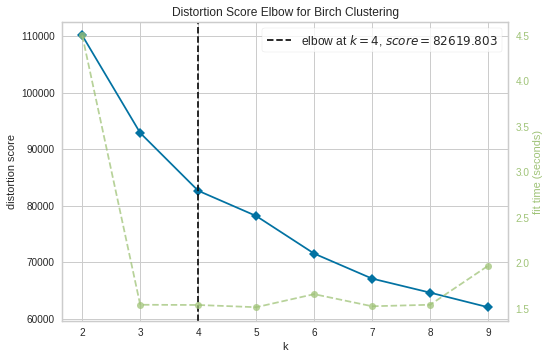

<AxesSubplot:title={'center':'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = Birch()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_pca2)        # Fit the data to the visualizer
visualizer.poof()

For n_clusters = 2 The average silhouette_score is : 0.24512394890919648
For n_clusters = 3 The average silhouette_score is : 0.22261200408242107
For n_clusters = 4 The average silhouette_score is : 0.18457335224380955
For n_clusters = 5 The average silhouette_score is : 0.1758497038262128
For n_clusters = 6 The average silhouette_score is : 0.18861099845137064
For n_clusters = 7 The average silhouette_score is : 0.2014629065375718


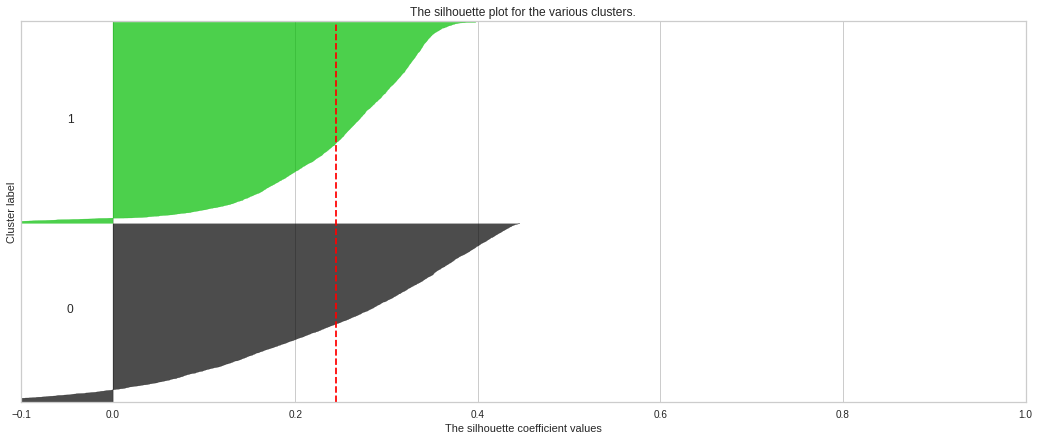

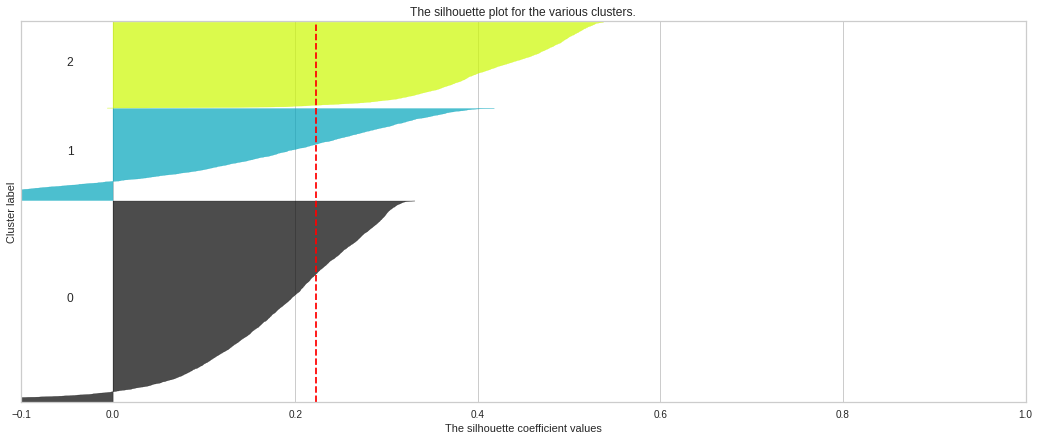

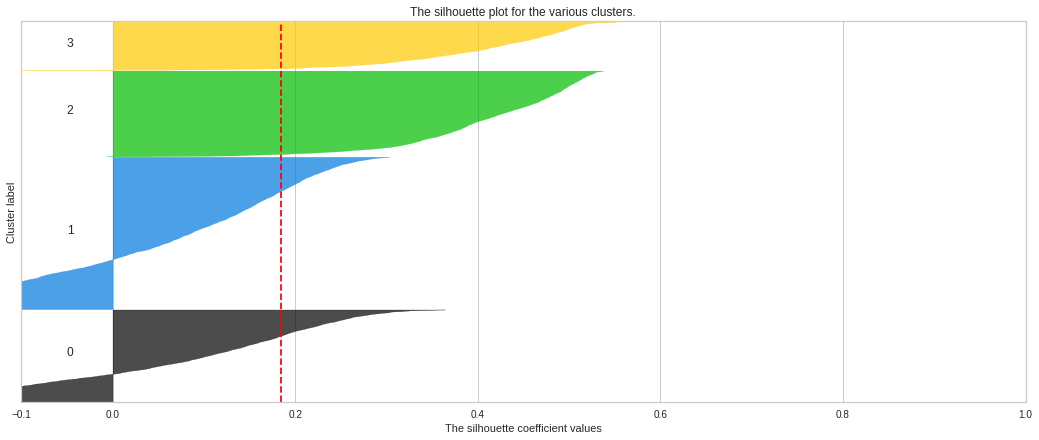

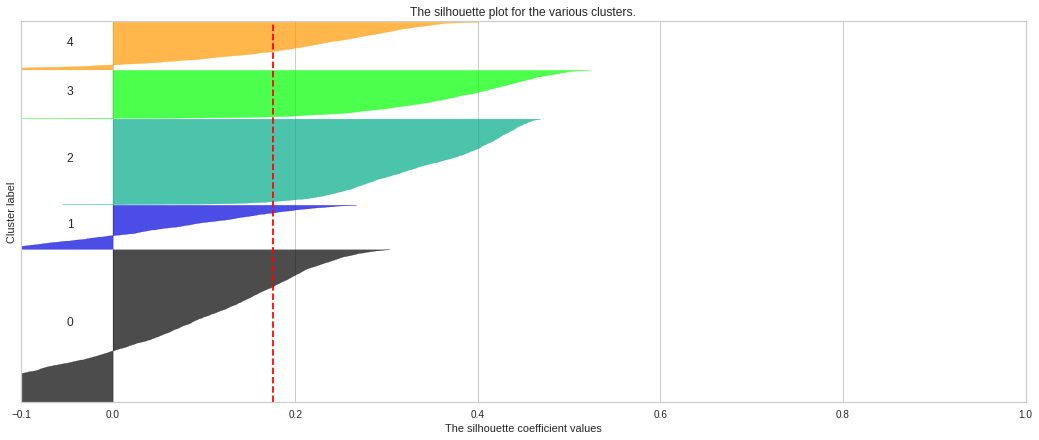

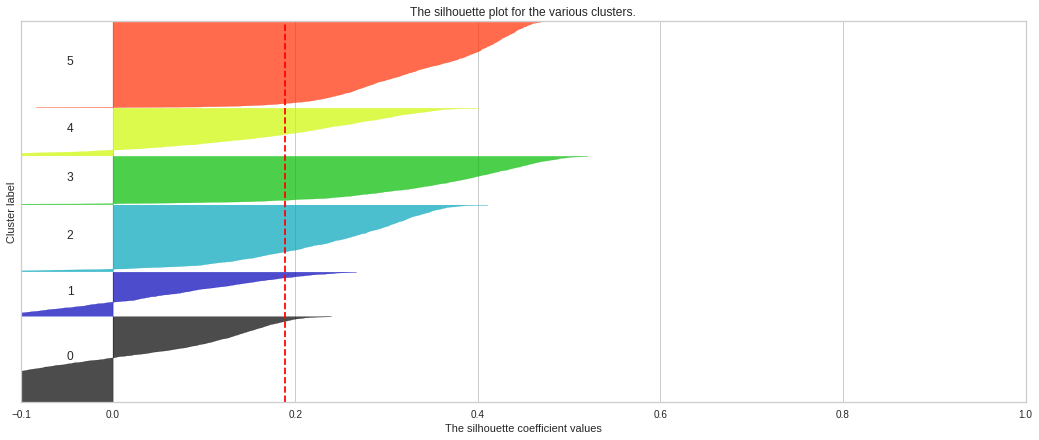

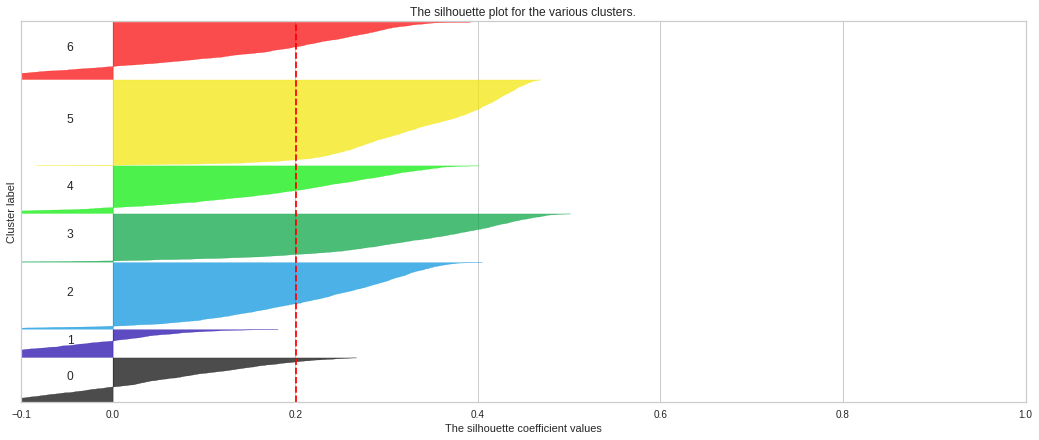

In [16]:
silhouette_plot2(df_pca2, range_n_clusters=[2, 3, 4, 5, 6,7])

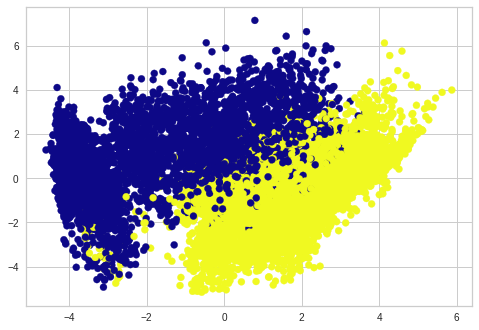

In [22]:
model = Birch(threshold=0.01, n_clusters=2)
model.fit(df_pca2)
yhat = model.predict(df_pca2)
b_labels=model.labels_
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(df_pca2[:,0], df_pca2[:,1], c = yhat, cmap = 'plasma')
plt.show()

In [23]:
make_3d_viz(df_pca2, labels=b_labels)

##Observation 


Although the data got better and closer to normal distribution, the three algorithms give us very bad clustering. KMeans and Brich didn't get more than 27 % accuracy !!! and DBSCAN was very bad, so we will choose RobustScaler with Brich algorithm for clustering. 